### Creating Tensorflow Estimator Class with Vertex AI

In [4]:
PROJECT_ID = 'jchavezar-demo'
NUM_NEURONS = 32
L_RATE = 0.001
EPOCHS = 10
TRAIN_START_DATE = "20160801"
TRAIN_END_DATE = "20170430"

In [6]:
from src import Estimator

VertexTF = Estimator.VertexTF(
    project_id=PROJECT_ID,
    epochs=10
)
train, val, test = VertexTF.query(start_date=TRAIN_START_DATE, end_date=TRAIN_END_DATE)

In [7]:
## Prepare data by splitting, shuffling, transform to tensors, normalize and encode categorical values.

train_ds, val_ds, test_ds = VertexTF.preprocessing(target_column='will_buy_on_return_visit')

2022-10-17 22:54:30.710971: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-17 22:54:30.714029: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-17 22:54:30.714038: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/jesusarguelles/code/vertex-gpu/pipe_notebook/bqml_estimator/src/data/Transform.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, va

['source', 'medium', 'channelGrouping', 'deviceCategory', 'country']
['latest_ecommerce_progress', 'bounces', 'time_on_site', 'pageviews']


In [8]:
model = VertexTF.create_model(nn_input=NUM_NEURONS, lr=L_RATE)

In [6]:
model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

Epoch 1/10


/home/jesusarguelles/miniconda3/envs/gcp/lib/python3.7/site-packages/keras/engine/functional.py:566: UserWarning: Input dict contained keys ['will_buy_on_return_visit', 'source', 'medium', 'channelGrouping', 'deviceCategory'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


14325/14325 [==============================] - 19s 1ms/step - loss: 0.0689 - accuracy: 0.9845 - val_loss: 0.0573 - val_accuracy: 0.9846
Epoch 2/10
14325/14325 [==============================] - 18s 1ms/step - loss: 0.0600 - accuracy: 0.9847 - val_loss: 0.0575 - val_accuracy: 0.9846
Epoch 3/10
14325/14325 [==============================] - 19s 1ms/step - loss: 0.0598 - accuracy: 0.9847 - val_loss: 0.0574 - val_accuracy: 0.9846
Epoch 4/10
14325/14325 [==============================] - 19s 1ms/step - loss: 0.0597 - accuracy: 0.9847 - val_loss: 0.0575 - val_accuracy: 0.9846
Epoch 5/10
14325/14325 [==============================] - 21s 1ms/step - loss: 0.0597 - accuracy: 0.9847 - val_loss: 0.0576 - val_accuracy: 0.9846
Epoch 6/10
14325/14325 [==============================] - 18s 1ms/step - loss: 0.0596 - accuracy: 0.9847 - val_loss: 0.0576 - val_accuracy: 0.9846
Epoch 7/10
14325/14325 [==============================] - 32s 2ms/step - loss: 0.0596 - accuracy: 0.9847 - val_loss: 0.0574 - val

In [7]:
loss, accuracy = model.evaluate(test_ds)

1791/1791 [==============================] - 2s 993us/step - loss: 0.0586 - accuracy: 0.9847


<AxesSubplot:>

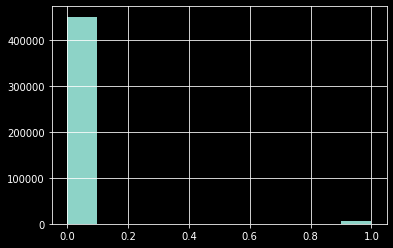

In [10]:
train['will_buy_on_return_visit'].hist()

<AxesSubplot:>

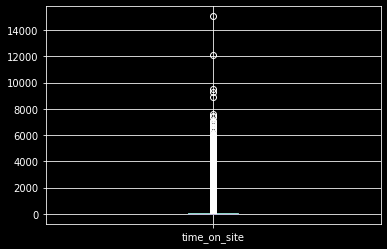

In [21]:
train.boxplot(column='time_on_site', return_type='axes')